# Walkthrough 2D

In [1]:
from gait3d.gaitanalysis_top import RecordingTop
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
files = [file for file in Path("/Users/kobel/Downloads/DLC_data/").iterdir() if file.name.endswith('filtered.csv')]
files

[PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-87_220811_OTEDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/209_F1-91_220811_OTT001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/195_F8-16_220809_OTT001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-87_220810_OTTDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/195_F8-20_220811_OTR001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-81_220809_OTRDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-87_220809_OTRDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/209_F1-92_220811_OTR001DLC_resnet152_OT_TopC

In [3]:
objects = [] 
for file in files:
    try:
        obj = RecordingTop(filepath=Path(file), recorded_framerate=30)
        print(obj.metadata)
        obj.run(intrinsic_camera_calibration_filepath="/Users/kobel/Downloads/Checkerboard_Calibration/Top_checkerboard_intrinsic_calibration_results.p")
        obj.get_freezing_bouts()
        obj.run_gait_analysis()
        obj.export_as_session()
        print(obj.session_df)
        objects.append(obj)    
    except OverflowError:
        print('could not be normalized\n')

{'recording_date': '220811', 'animal': '206_F2-87', 'paradigm': 'OTEDLC', 'cam': 'resnet152'}
Normalized using coverage: 0.95 and likelihood: 0.9979999999999991
, 89.34256013627758, 87.25082476330518
                       mean_value total_count mean_x_position mean_duration  \
average_speed_cm_per_s   5.787534         NaN             NaN           NaN   
immobility                    NaN          31        8.294619      0.273118   
gait_disruption               NaN          15        8.631611      9.793333   
gait                          NaN         393       12.282164      0.770738   

                       total_count_facing_open mean_duration_facing_open  \
average_speed_cm_per_s                     NaN                       NaN   
immobility                                   8                  0.254167   
gait_disruption                              5                  2.886667   
gait                                       188                  0.597518   

                       

In [4]:
objects[0].session_df

,mean_value,total_count,mean_x_position,mean_duration,total_count_facing_open,mean_duration_facing_open,mean_x_position_facing_open
average_speed_cm_per_s,5.787534,NaN,NaN,NaN,NaN,NaN,NaN
immobility,NaN,31,8.294619,0.273118,8,0.254167,7.890104
gait_disruption,NaN,15,8.631611,9.793333,5,2.886667,7.155316
gait,NaN,393,12.282164,0.770738,188,0.597518,15.849234


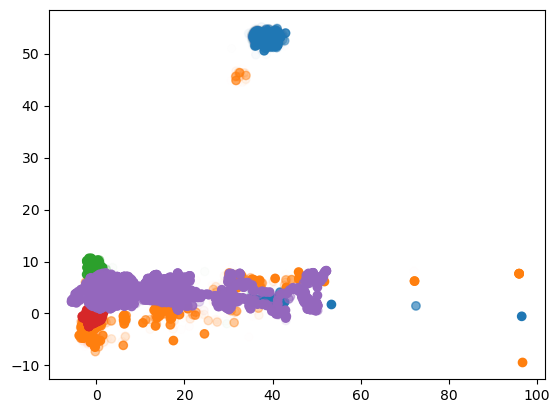

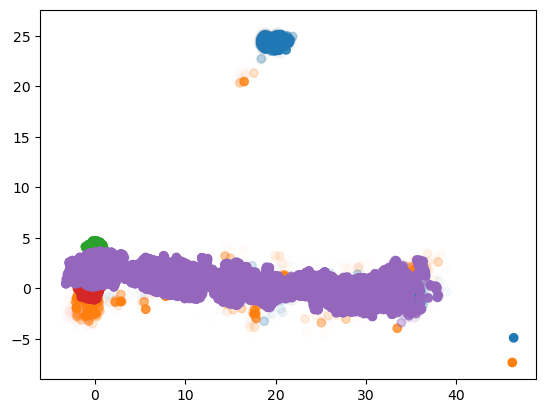

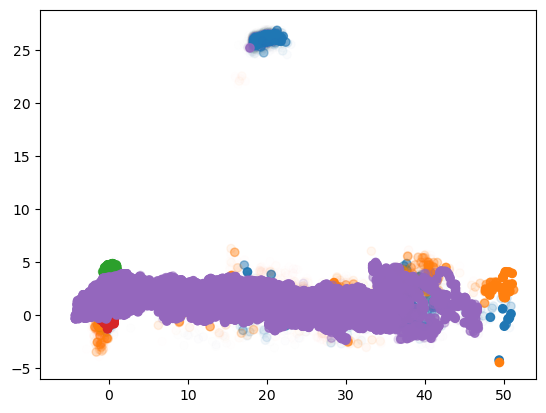

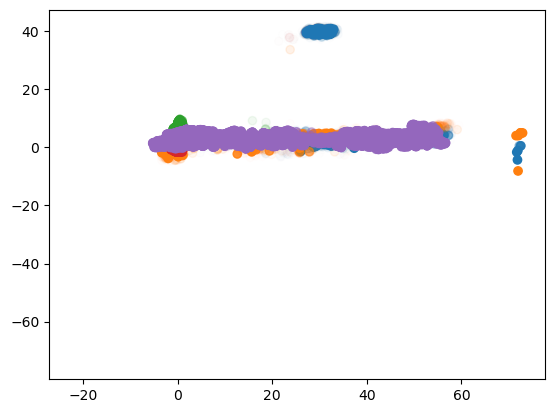

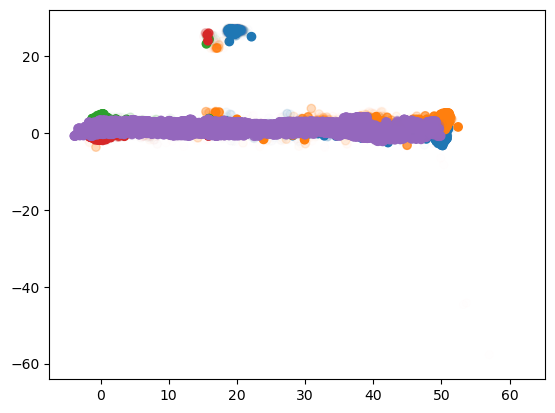

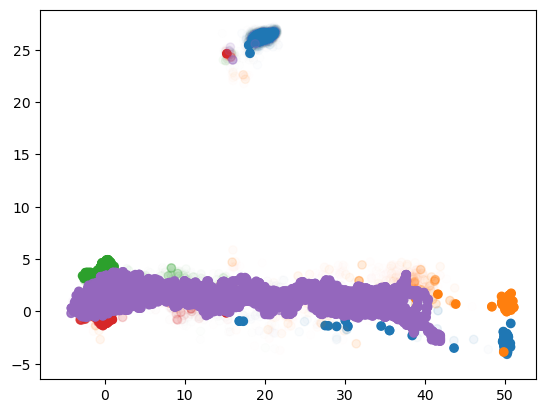

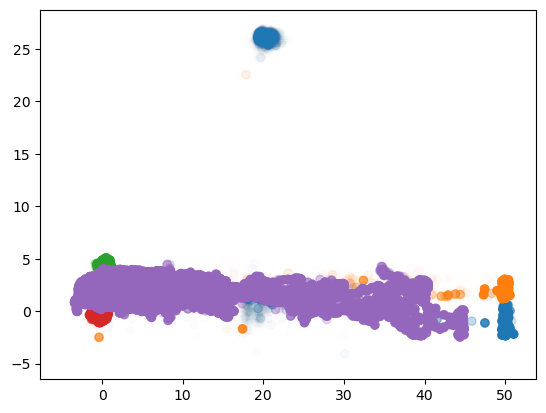

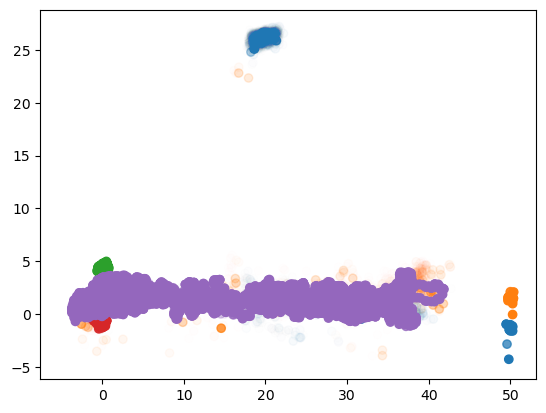

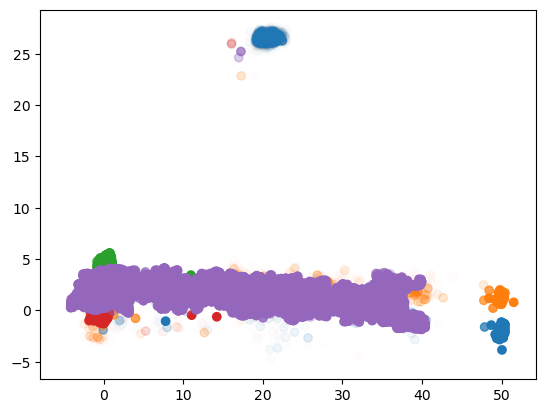

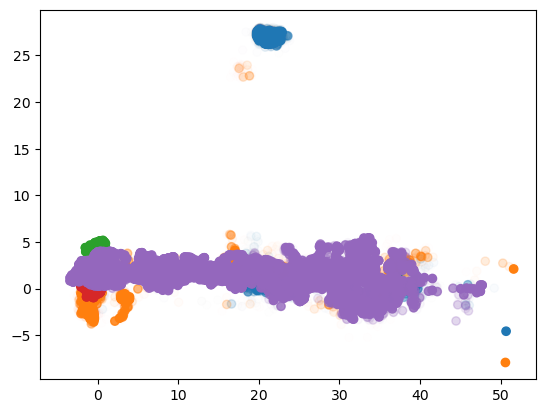

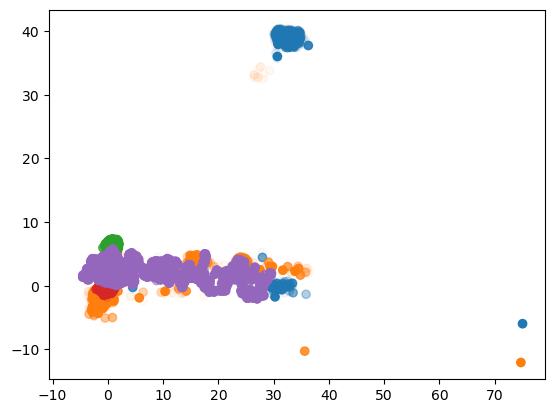

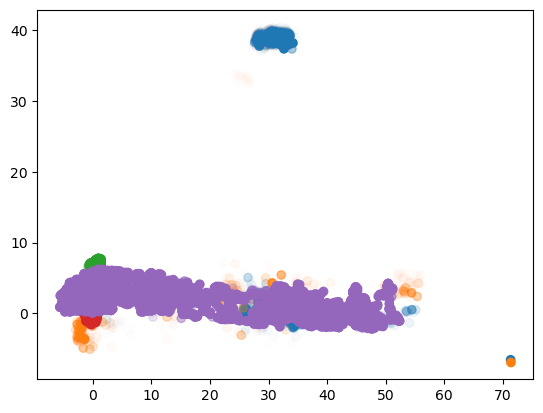

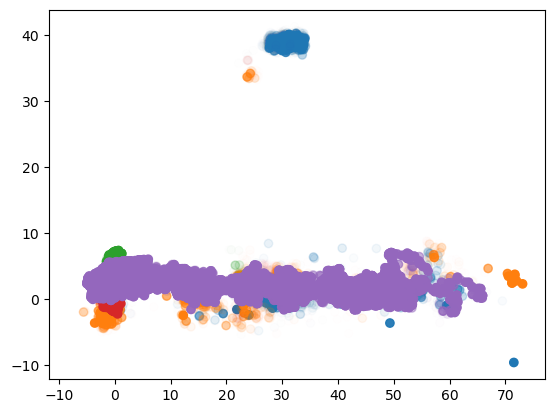

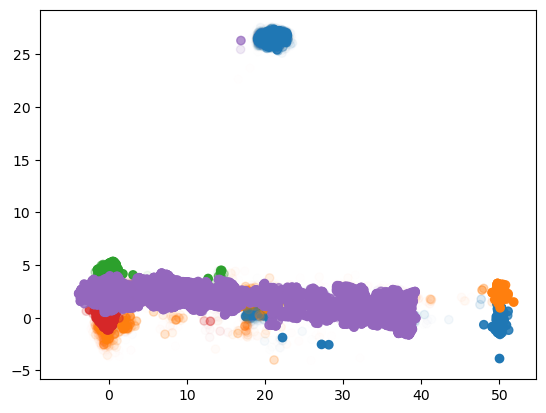

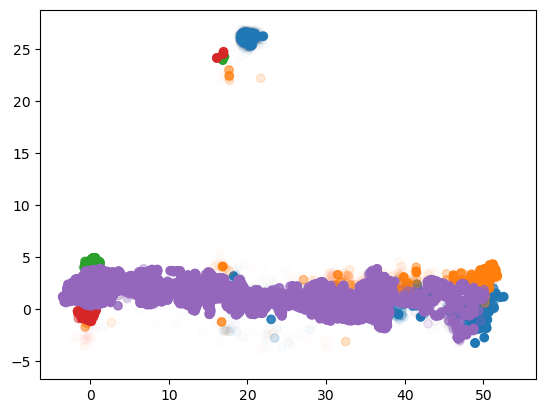

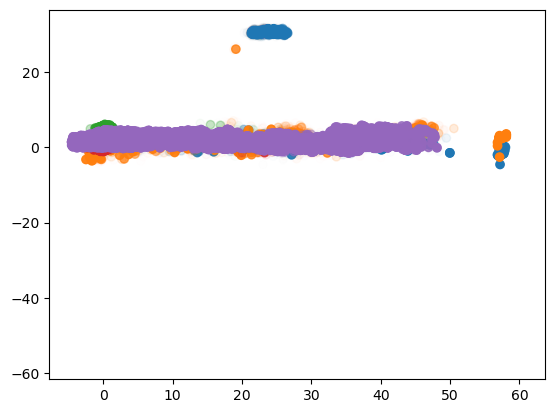

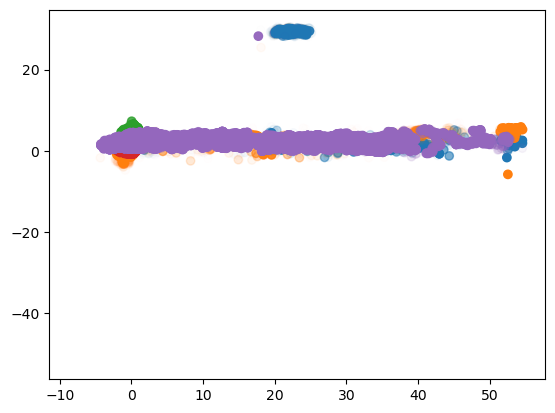

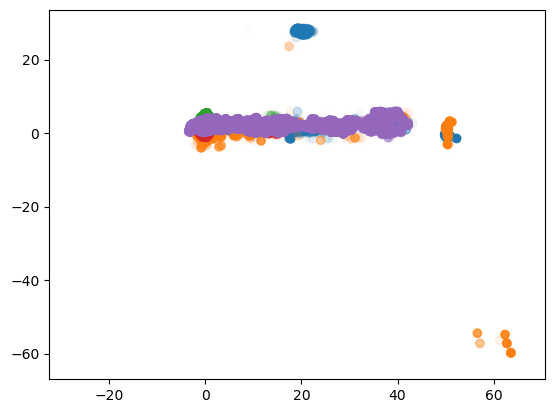

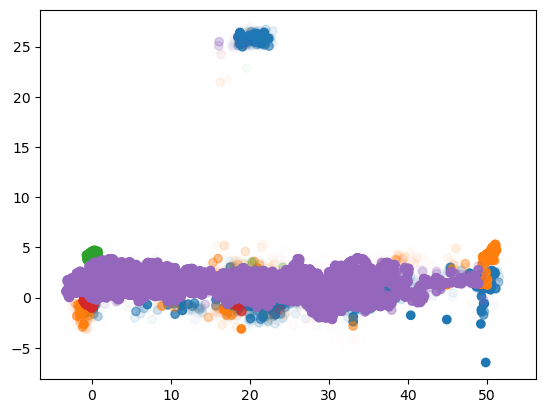

In [5]:
for bot in objects:
    fig = plt.figure()
    for corner in ['MazeCornerOpenLeft', 'MazeCornerOpenRight', 'MazeCornerClosedRight', 'MazeCornerClosedLeft']:
        plt.scatter(bot.bodyparts[corner].df['x'], bot.bodyparts[corner].df['y'], alpha = bot.bodyparts[corner].df['likelihood'])
    plt.scatter(bot.bodyparts['Snout'].df['x'], bot.bodyparts['Snout'].df['y'], alpha = bot.bodyparts['Snout'].df['likelihood'])
    plt.show()

In [6]:
len(files), len(objects)

(26, 19)

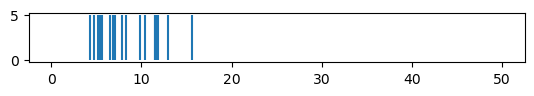

In [7]:
parameter = 'immobility'

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)
for obj in objects:
    try:
        plt.vlines(obj.session_df.loc[parameter, 'mean_x_position'], 0, 5)
    except:
        continue
plt.show()

249


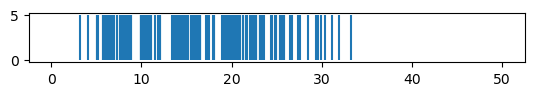

In [8]:
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)
for bout in bot.immobility_bouts.events:
    plt.vlines(bout.dict['x_position'], 0, 5, alpha=1)
print(len(bot.immobility_bouts.events))
plt.show()